In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import collections
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import xgboost as xgb

from FairReg import FairReg
from evaluation import get_stats, get_risk_unf_wrt_eps
from evaluation_measures import DP_unfairness, prob_unfairness, prob_unfairness_summary, DP_unfairness_summary
from plots import plot_distributions_compare, plot_predictions_compare, plot_distributions, plot_predictions, plot_risk_history,plot_unfairness_history,plot_unfairness_vs_risk, plot_risk_unf_compare, plot_risk_unf_wrt_eps
from data_prep import get_lawschool_data, get_communities_data, get_frequencies

In [2]:
eps_list = []
#i_list = [0, 0.5, 1, 2, 4, 8, 16, 32]
i_list = [0, 2, 4, 8]
for i in i_list:
    eps_list+=[[2**(-i), 2**(-i)]]
num=1
T=793

results_crime = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 4  : collecting statistics for eps=[1, 1]
S1: 9
N1: 0
K1: -5
N1: 0
K1: -4
N1: 0
K1: -3
N1: 0
K1: -2
N1: 0
K1: -1
N1: 1
K1: 0
N1: 2
K1: 1
N1: 4
K1: 2
N1: 9
K1: 3
stoch_grad counter:  2483
-----    1 / 1 : training completed, statistics collected
---------------------------------------------------------
2 / 4  : collecting statistics for eps=[0.25, 0.25]
S1: 9
N1: 0
K1: -5
N1: 0
K1: -4
N1: 0
K1: -3
N1: 0
K1: -2
N1: 0
K1: -1
N1: 1
K1: 0
N1: 2
K1: 1
N1: 4
K1: 2
N1: 9
K1: 3
stoch_grad counter:  2483
-----    1 / 1 : training completed, statistics collected
---------------------------------------------------------
3 / 4  : collecting statistics for eps=[0.0625, 0.0625]
S1: 9
N1: 0
K1: -5
N1: 0
K1: -4
N1: 0
K1: -3
N1: 0
K1: -2
N1: 0
K1: -1
N1: 1
K1: 0
N1: 2
K1: 1
N1: 4
K1: 2
N1: 9
K1: 3
stoch_grad counter:  2483
-----    1 / 1 : training completed, statistics collected
---------------------------------------------------------
4 / 4  : collecting statistics for eps=[0.00390625, 0.00390625]

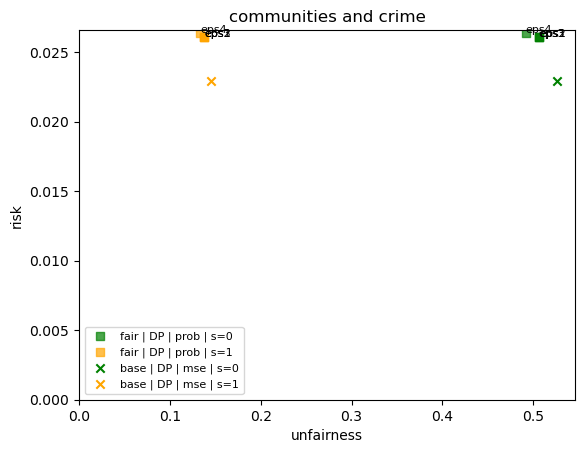

In [3]:
pairs_list = [[results_crime['unf'], results_crime['risk']], [results_crime['base_DP'], results_crime['base_risk']]]
model_list = ['fair', 'base']
unf_type_list = ['DP', 'DP']
risk_type_list = ['prob', 'mse']
markers_list = ['s','x']

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list, 
                      markers_list=markers_list, dataset='communities and crime',
                      x_label = 'unfairness', y_label = 'risk',
                      K=2, colors = ['g', 'orange'], alpha=0.7, annotate = True, loglog=False)